In [6]:
from sklearn.datasets import fetch_california_housing
import pandas as pd
import seaborn as sns

In [5]:
data = fetch_california_housing()
X = pd.DataFrame(data.data, columns=data.feature_names)
y = data.target

In [7]:
print(data.feature_names)

['MedInc', 'HouseAge', 'AveRooms', 'AveBedrms', 'Population', 'AveOccup', 'Latitude', 'Longitude']


<Axes: xlabel='MedInc'>

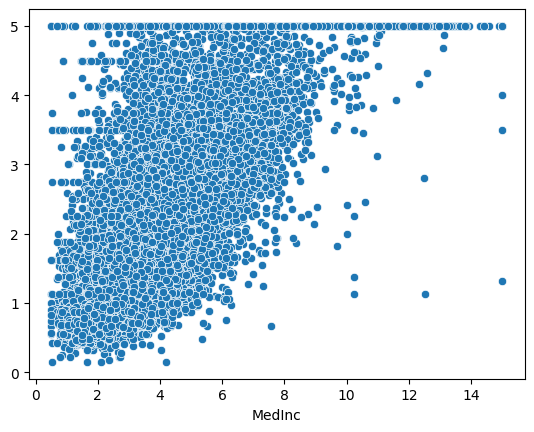

In [13]:
sns.scatterplot(x=X["MedInc"], y=y)

<Axes: xlabel='MedInc'>

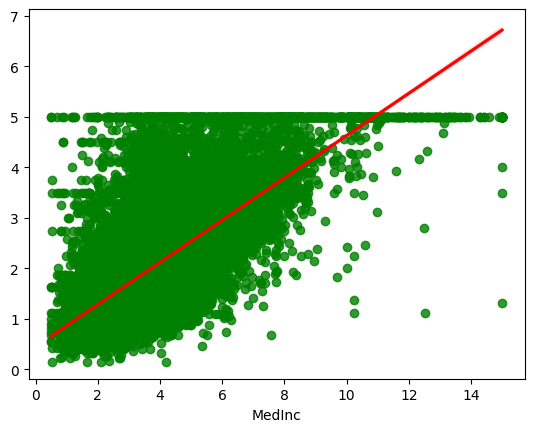

In [15]:
sns.regplot(x=X["MedInc"], y=y, scatter_kws={"color":"green"}, line_kws={"color":"red"})

In [18]:
X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 8 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   MedInc      20640 non-null  float64
 1   HouseAge    20640 non-null  float64
 2   AveRooms    20640 non-null  float64
 3   AveBedrms   20640 non-null  float64
 4   Population  20640 non-null  float64
 5   AveOccup    20640 non-null  float64
 6   Latitude    20640 non-null  float64
 7   Longitude   20640 non-null  float64
dtypes: float64(8)
memory usage: 1.3 MB


In [20]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [21]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
x_train_scaled = scaler.fit_transform(x_train)
x_test_scaled = scaler.transform(x_test)

In [22]:
from sklearn.linear_model import LinearRegression
model = LinearRegression()
model.fit(x_train_scaled, y_train)


,fit_intercept,True
,copy_X,True
,tol,1e-06
,n_jobs,None
,positive,False


<Axes: >

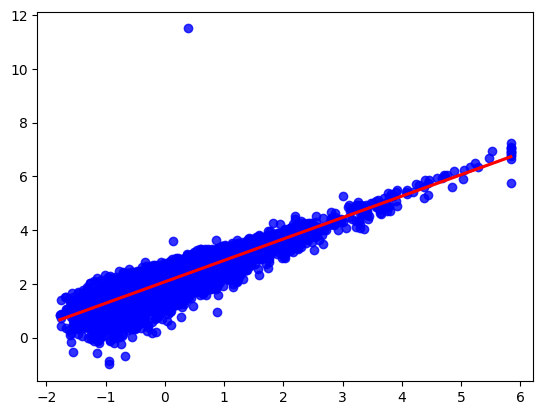

In [30]:
sns.regplot(x=x_test_scaled[:, 0], y=model.predict(x_test_scaled),color='red', scatter_kws={"color":"blue"})

In [31]:
from sklearn.metrics import mean_squared_error, r2_score
y_pred = model.predict(x_test_scaled)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
print(f"Mean Squared Error: {mse}")
print(f"R^2 Score: {r2}")

Mean Squared Error: 0.5305677824766752
R^2 Score: 0.5957702326061664


In [32]:
from sklearn.linear_model import Ridge, RidgeCV

In [42]:
ridge = Ridge(alpha=3)
ridge.fit(x_train_scaled, y_train)

,alpha,3
,fit_intercept,True
,copy_X,True
,max_iter,None
,tol,0.0001
,solver,'auto'
,positive,False
,random_state,None


In [43]:
r2 = r2_score(y_test, ridge.predict(x_test_scaled))
print(f"Ridge Regression R^2 Score: {r2}")

Ridge Regression R^2 Score: 0.5958245657757808


In [41]:
ridge_cv = RidgeCV(alphas=[0.1, 1,2,3,4, 10, 50, 100, 200])
ridge_cv.fit(x_train_scaled, y_train)

print("\nBest alpha:", ridge_cv.alpha_)
print("CV Score:", ridge_cv.score(x_train_scaled, y_train))


Best alpha: 3.0
CV Score: 0.6093451663545418
